In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import skimage.io
import skimage.feature
import skimage.transform

import os
from glob import glob
import re

%matplotlib inline

In [ ]:
# read the folders in a list
folder = os.listdir('dataprepare_machinelearning_pipeline/data')
print(folder)

In [ ]:
all_path = []
for f in folder:
    all_path += glob('./dataprepare_machinelearning_pipeline/data/{}/*.jpg'.format(f))

In [ ]:
all_path

In [ ]:
#Read all image and label
img_all = skimage.io.ImageCollection(all_path)

In [ ]:
len(img_all)

2057

In [ ]:
img_all.files


In [ ]:
# Labeling
# Extracting text folder
def extract_label(text):
    try:
        label = re.search(r'./dataprepare_machinelearning_pipeline/data/(.*?)Head\\',text).group(1)
    except:
        label = re.search(r'./dataprepare_machinelearning_pipeline/data/(.*?)\\',text).group(1)
        
    return label.lower()

In [ ]:
labels = list(map(extract_label,img_all.files))

In [ ]:
len(labels)


2057

In [ ]:
def buffer(io):
    return io
img_all_arrs = np.array(list(map(buffer,img_all)))

In [ ]:
img_all_arrs.shape

(2057, 80, 80, 3)

In [ ]:
data = dict()

data['description']= 'there are 20 classes and 2057 images are there of 80 x 80 (rgb)'
data['data'] = img_all_arrs
data['target'] = labels
data['labels'] = set(labels)

In [ ]:
data


In [ ]:
# save the file in pickle
import pickle
import collections

In [ ]:
pickle.dump(data,open('dataprepare_machinelearning_pipeline/data_animals_head_20.pickle','wb'))

In [ ]:
count_values = collections.Counter(data['target'])
count_values

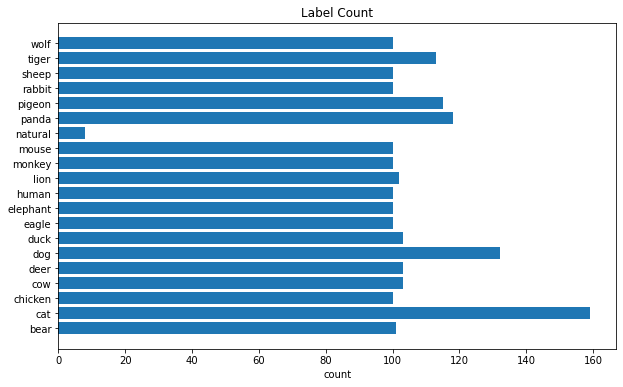

In [ ]:
y_axis = list(count_values.keys())
values = count_values.values()
plt.figure(figsize=(10,6))
plt.barh(y_axis,values)
plt.xlabel('count')
plt.title('Label Count')
plt.show()

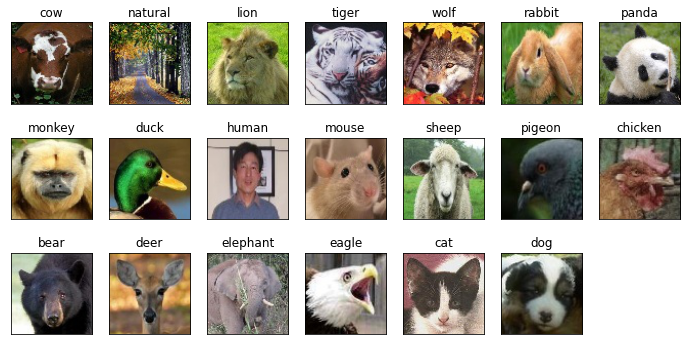

In [ ]:
plt.figure(figsize=(12,6))
for i,c in enumerate(data["labels"]):
    index = data["target"].index(c)
    img = data['data'][index]
    plt.subplot(3,7,i+1)
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
    plt.title(c)
    
plt.show()